In [161]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns


In [162]:

participants_list = ["Egypt", "South Korea", "United States", "Portugal", "Poland", "Sweden", "Indonesia", "Rwanda", "Ivory Coast", "China", "United Arab Emirates", "Kenya", "United Kingdom", "Italy", "Switzerland", "Spain", "France", "Norway", "Netherlands", "Iceland", "Germany", "Greece", "Luxembourg"]
participants_list_codes = ["EGY", "KOR", "USA", "PRT", "POL", "SWE", "IDN", "RWA", "CIV", "CHN", "ARE", "KEN", "GBR", "ITA", "CHE", "ESP", "FRA", "NOR", "NLD", "ISL", "DEU", "GRC", "LUX" ]
non_participants_list = ["Japan", "India", "Brazil", "Canada", "Russia", "Australia", "Mexico", "Turkey", "Saudi Arabia", "Argentina", "Belgium", "Thailand", "Iran", "Austria", "Nigeria", "Israel", "South Africa", "Ireland", "Denmark", "Singapore", "Malaysia", "Colombia", "Philippines"]
non_participants_list_codes = ['ARG', 'AUS', 'AUT', 'BEL', 'BRA', 'CAN', 'COL', 'DNK', 'IND', 'IRN', 'IRL', 'ISR', 'JPN', 'MYS', 'MEX', 'NGA', 'PHL', 'RUS', 'SAU', 'SGP', 'ZAF', 'THA', 'TUR']
data = pd.read_csv("annual-co-emissions-by-region.csv")
data["Entity"].replace({"Cote d'Ivoire" : "Ivory Coast"}, inplace=True)
display(data)


,Entity,Code,Year,Annual CO2 emissions (zero filled)
0,Afghanistan,AFG,1750,0
1,Afghanistan,AFG,1751,0
2,Afghanistan,AFG,1752,0
3,Afghanistan,AFG,1753,0
4,Afghanistan,AFG,1754,0
...,...,...,...,...
66932,Zimbabwe,ZWE,2016,10737567
66933,Zimbabwe,ZWE,2017,9581633
66934,Zimbabwe,ZWE,2018,11854367
66935,Zimbabwe,ZWE,2019,10949084


In [163]:
#Participant Countries by CO2 emissions/year

part_CO2 = data.loc[data["Entity"].isin(participants_list)]
part_CO2 = part_CO2.loc[part_CO2["Year"] >= 1960]
part_CO2.drop(columns = "Code", inplace = True)
part_CO2 = part_CO2.pivot(index= "Year", columns = "Entity")
part_CO2.columns = part_CO2.columns.droplevel(0)
part_CO2["part_mean"] = part_CO2.mean(axis=1)
part_CO2["part_sum"] = part_CO2.sum(axis=1)
part_CO2.index = part_CO2.index.map(str)
display(part_CO2)

Entity,China,Egypt,France,Germany,Greece,Iceland,Indonesia,Italy,Ivory Coast,Kenya,...,Rwanda,South Korea,Spain,Sweden,Switzerland,United Arab Emirates,United Kingdom,United States,part_mean,part_sum
Year,,,,,,,,,,,,,,,,,,,,,
1960,798799921,16032731,295396413,813950210,9391531,1212488,21385193,109203087,461664,2424144,...,69825,12540118,48865574,49170521,19498527,10992,584020018,2897138041,2.602345e+08,6.245628e+09
1961,570630187,17065918,314658506,834839623,9808427,1091575,26001595,124374897,553264,2398585,...,91495,14448706,53606856,48799507,20360943,10992,588614801,2886696092,2.535261e+08,6.084627e+09
1962,459618074,18571110,331822402,883168603,10148825,1197742,22974894,146254985,586240,2622025,...,84272,17261588,59975850,51272587,24123366,18320,592931499,2993718164,2.587448e+08,6.209875e+09
1963,456779449,21526859,337791461,945497986,12239481,1303997,22763095,164556239,622880,2852859,...,84272,21083171,58742903,55313057,29070360,21984,603385663,3126294023,2.703691e+08,6.488857e+09
1964,460637094,25491247,367995875,968917486,13201597,1307601,22374265,175721076,762112,2823250,...,36640,22195155,64323808,60368070,28129375,18320,607865989,3264110570,2.811048e+08,6.746515e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,9720444086,234122634,333578746,800686632,71372744,3487423,560845982,358060743,11798080,17155983,...,1036390,639258641,260757956,43262009,39192544,214666772,399337394,5248023931,8.500307e+08,2.040074e+10
2017,9920459189,250604761,336995589,785882918,74855081,3604886,575175792,352849912,11860368,16322312,...,1050459,655747114,274641963,42593728,38182513,168831314,387565181,5207751278,8.571361e+08,2.057127e+10
2018,10289989525,227721467,322371888,754111607,71807547,3663377,614884277,349020446,10251872,18016496,...,1142030,671630709,269713437,42095408,36867631,154203574,381889659,5375490614,8.781049e+08,2.107452e+10


In [164]:
#next most industrialiced countries that aren't participating (CO2 emissions / year)

non_part_CO2 = data.loc[data["Entity"].isin(non_participants_list)]
non_part_CO2 = non_part_CO2.loc[non_part_CO2["Year"] >= 1960]
non_part_CO2.drop(columns = "Code", inplace = True)
non_part_CO2 = non_part_CO2.pivot(index= "Year", columns = "Entity")
non_part_CO2.columns = non_part_CO2.columns.droplevel(0)
non_part_CO2["non_part_mean"] = non_part_CO2.mean(axis=1)
non_part_CO2["non_part_sum"] = non_part_CO2.sum(axis=1)
non_part_CO2.index = non_part_CO2.index.map(str)
non_part_CO2

Entity,Argentina,Australia,Austria,Belgium,Brazil,Canada,Colombia,Denmark,India,Iran,...,Nigeria,Philippines,Russia,Saudi Arabia,Singapore,South Africa,Thailand,Turkey,non_part_mean,non_part_sum
Year,,,,,,,,,,,,,,,,,,,,,
1960,48764500,88118900,30784479,90908083,46851821,192716175,16390487,29749520,111450248,37358599,...,3403173,8325063,882927058,2674363,1392320,97843513,3709492,16798537,8.815427e+07,2.115703e+09
1961,51126710,90503896,31824045,92698294,49144503,194000694,18196304,31701867,120539453,36508758,...,4109552,8712524,910542450,3568320,2092144,102119846,4140715,17340838,9.308678e+07,2.234083e+09
1962,53640125,94823455,33864981,98018304,53631449,206990771,19419485,36889884,132728645,37428423,...,4174999,10335915,955666762,6250041,2513415,105669994,5026779,21604546,9.830877e+07,2.359411e+09
1963,50032660,100934264,36949060,105676390,55550938,210910776,21232780,40667913,142601450,41304935,...,5343636,11471815,1024911159,6938814,3301367,109725151,5561604,22639942,1.049721e+08,2.519329e+09
1964,55670041,108875767,38896434,103553992,56666677,237577733,21682947,43146926,139639166,47519079,...,7266700,12822820,1090019669,7041168,3601712,119546018,7470283,26302962,1.126584e+08,2.703802e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,190977194,415945172,67215457,99872138,492748000,559566962,93241979,37011386,2382223220,637361528,...,115821151,122237309,1618598940,639056486,40274688,464769069,283434535,401239738,4.652194e+08,1.116527e+10
2017,187804729,414751197,69598854,99448135,500757715,569360436,86295788,34743087,2433855754,712256079,...,114043392,134901810,1646456968,639377966,39065568,464198740,285959563,425329230,4.719454e+08,1.132669e+10
2018,181099627,416001157,66565408,100227169,483685288,579470372,84880525,34672351,2599805717,707157389,...,127928170,140658221,1691646718,621952743,46001520,464192622,276176956,419436905,4.787954e+08,1.149109e+10


<AxesSubplot:xlabel='Year'>

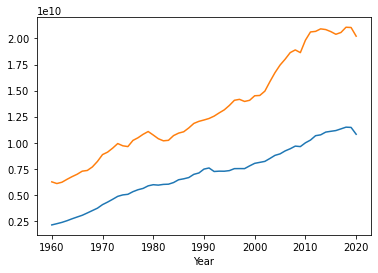

In [165]:
#Comparison Total CO2 emissions

bx = non_part_CO2["non_part_sum"].plot()
part_CO2["part_sum"].plot(ax=bx)

In [166]:
#mean temperature of participant countries per year

part_temps = {}
for code in participants_list_codes:
    df = pd.read_csv("tas_timeseries_annual_cru_1901-2020_"+code+".csv")
    df = df.set_index("Year")
    df.drop(columns=[col for col in df if col not in participants_list], inplace=True)
    part_temps[code] = df
    
part_temps

part_df= pd.concat(part_temps, axis=1)
part_df.columns = part_df.columns.droplevel()
part_df = part_df[part_df.index>=1960]
part_df["Mean_Temp"] = part_df.mean(axis=1) 
part_df


,Egypt,South Korea,United States,Portugal,Poland,Sweden,Indonesia,Rwanda,Ivory Coast,China,...,Switzerland,Spain,France,Norway,Netherlands,Iceland,Germany,Greece,Luxembourg,Mean_Temp
Year,,,,,,,,,,,,,,,,,,,,,
1960,22.88,11.12,8.57,14.77,7.90,1.93,25.71,18.76,26.36,6.63,...,4.93,13.00,10.74,1.26,9.56,2.70,8.60,14.32,9.02,12.657826
1961,21.65,11.35,8.47,15.71,8.51,3.05,25.58,18.82,26.29,6.82,...,5.91,13.80,11.43,2.05,9.89,2.10,9.18,14.14,9.50,12.904348
1962,22.81,10.60,8.76,14.90,7.06,1.18,25.55,18.64,26.28,6.51,...,4.25,12.98,9.88,0.43,8.14,1.56,7.43,14.27,7.69,12.156522
1963,22.83,10.03,8.92,14.53,6.99,1.69,25.62,18.64,26.56,6.75,...,4.07,12.60,9.47,0.91,7.82,1.56,7.37,14.20,7.47,12.103478
1964,21.57,11.10,8.34,15.12,7.48,2.35,25.62,18.65,26.11,6.43,...,5.17,13.26,10.56,1.47,9.11,2.46,8.38,13.52,8.84,12.442609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,23.73,12.09,10.68,15.94,9.36,3.28,26.42,19.52,27.26,7.79,...,6.33,14.34,11.81,2.52,10.60,3.15,9.91,14.89,10.12,13.739565
2017,23.20,11.74,10.24,16.33,9.15,2.97,26.22,19.68,27.13,7.94,...,6.45,14.59,12.01,2.18,10.82,2.94,9.93,14.52,10.43,13.679565
2018,23.98,11.62,9.89,15.61,10.00,3.41,26.23,19.27,26.98,7.58,...,7.24,14.19,12.66,2.44,11.30,2.74,10.73,15.22,11.10,13.853043


In [167]:
#mean temperature of non-participant countries per year

non_part_temps = {}
for code in non_participants_list_codes:
    df = pd.read_csv("tas_timeseries_annual_cru_1901-2020_"+code+".csv")
    df = df.set_index("Year")
    df.drop(columns=[col for col in df if col not in non_participants_list], inplace=True)
    non_part_temps[code] = df
    
non_part_temps

non_part_df= pd.concat(non_part_temps, axis=1)
non_part_df.columns = non_part_df.columns.droplevel()
non_part_df = non_part_df[non_part_df.index>=1960]
non_part_df["Mean_Temp"] = non_part_df.mean(axis=1) 
non_part_df

,Argentina,Australia,Austria,Belgium,Brazil,Canada,Colombia,Denmark,India,Iran,...,Mexico,Nigeria,Philippines,Russia,Saudi Arabia,Singapore,South Africa,Thailand,Turkey,Mean_Temp
Year,,,,,,,,,,,,,,,,,,,,,
1960,14.69,21.09,6.09,9.73,24.82,-4.65,24.55,7.64,24.38,17.04,...,20.63,26.80,25.32,-5.95,25.15,26.76,17.60,26.51,11.72,16.766522
1961,14.68,21.79,6.80,10.15,25.26,-5.26,24.57,8.45,24.02,17.08,...,20.61,26.21,25.16,-5.03,24.36,26.60,17.60,26.18,11.25,16.750435
1962,14.55,21.67,5.07,8.35,24.94,-5.16,24.47,6.98,24.09,17.14,...,20.95,26.61,25.05,-4.44,25.18,26.49,17.75,26.03,12.25,16.631739
1963,14.48,21.57,5.40,8.06,25.30,-4.88,24.64,6.68,24.24,17.59,...,20.78,26.96,24.90,-4.98,25.02,26.68,17.54,26.02,11.36,16.576957
1964,14.09,21.49,5.93,9.38,24.91,-5.67,24.34,7.50,24.25,16.16,...,20.48,26.60,25.21,-5.82,24.11,26.58,17.33,26.09,10.37,16.399130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,14.74,22.50,7.59,10.78,25.97,-3.35,25.48,9.02,25.27,18.70,...,21.81,27.73,26.36,-3.37,25.93,28.09,19.07,27.37,12.15,17.862174
2017,15.30,22.57,7.50,11.07,25.88,-3.97,24.90,8.90,25.15,18.49,...,22.09,27.39,25.91,-3.10,25.91,27.70,18.61,26.87,11.92,17.690000
2018,14.99,22.58,8.31,11.62,25.72,-4.86,24.82,9.51,25.00,18.99,...,21.71,27.36,26.11,-3.62,26.16,27.74,18.74,26.86,13.15,17.810870


<AxesSubplot:xlabel='Year'>

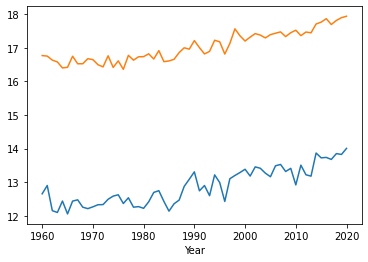

In [168]:
#Comparison of mean temperatures by groups.

ax = part_df["Mean_Temp"].plot()
non_part_df["Mean_Temp"].plot(ax=ax)

In [169]:
#Country Population / Year

pop = pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2_4150863.csv")
pop["Country Name"].replace({"Cote d'Ivoire" : "Ivory Coast"}, inplace=True)
pop["Country Name"].replace({'Egypt, Arab Rep.' : "Egypt"}, inplace=True)
pop["Country Name"].replace({'Korea, Rep.' : "South Korea"}, inplace=True)
pop["Country Name"].replace({'Iran, Islamic Rep.' : "Iran"}, inplace=True)
pop["Country Name"].replace({'Russian Federation' : "Russia"}, inplace=True)

pop

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,NaN,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,NaN,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,NaN,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,NaN,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,NaN,NaN
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315351.0,5393034.0,5473671.0,5556767.0,5641598.0,5727745.0,...,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0,29825968.0,NaN,NaN
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099836.0,17524533.0,17965733.0,18423157.0,18896303.0,19384838.0,...,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0,59308690.0,NaN,NaN
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070780.0,3164330.0,3260645.0,3360099.0,3463211.0,3570466.0,...,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0,18383956.0,NaN,NaN


In [170]:
#Country Population / Year for Participant Countries

part_pop = pop.loc[pop["Country Name"].isin(participants_list)]
part_pop.drop(columns = "Country Code", inplace = True)
part_pop.drop(columns = "Indicator Code", inplace = True)
part_pop.drop(columns = "Indicator Name", inplace = True)
part_pop.set_index("Country Name", inplace = True)
part_pop = part_pop.T
part_pop = part_pop.dropna()
part_pop["Total_Population"] = part_pop.sum(axis=1)
part_pop.index.names = ['Year']
part_pop

#missing1 = list(part_pop.columns)
#(set(missing1) | set(participants_list))-(set(missing1) & set(participants_list))

C:\Users\jadca\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Country Name,United Arab Emirates,Switzerland,China,Ivory Coast,Germany,Egypt,Spain,France,United Kingdom,Greece,...,South Korea,Luxembourg,Netherlands,Norway,Poland,Portugal,Rwanda,Sweden,United States,Total_Population
Year,,,,,,,,,,,,,,,,,,,,,
1960,92417.0,5327827.0,6.670700e+08,3503559.0,72814900.0,26632891.0,30455000.0,46621688.0,52400000.0,8331725.0,...,25012374.0,313970.0,11486631.0,3581239.0,29637450.0,8857716.0,2935575.0,7484656.0,180671000.0,1.329477e+09
1961,100801.0,5434294.0,6.603300e+08,3631547.0,73377632.0,27366239.0,30739250.0,47240526.0,52800000.0,8398050.0,...,25765673.0,316845.0,11638712.0,3609800.0,29964000.0,8929316.0,2998334.0,7519998.0,183691000.0,1.333043e+09
1962,112112.0,5573815.0,6.657700e+08,3770756.0,74025784.0,28112258.0,31023366.0,47904879.0,53250000.0,8448233.0,...,26513030.0,320750.0,11805689.0,3638918.0,30308500.0,8993985.0,3052937.0,7561588.0,186538000.0,1.348952e+09
1963,125130.0,5694247.0,6.823350e+08,3918630.0,74714353.0,28871383.0,31296651.0,48582624.0,53650000.0,8479625.0,...,27261747.0,324100.0,11965966.0,3666537.0,30712000.0,9030355.0,3105417.0,7604328.0,189242000.0,1.375962e+09
1964,138049.0,5789228.0,6.983550e+08,4071411.0,75318337.0,29644875.0,31609195.0,49230585.0,54000000.0,8510429.0,...,27984155.0,327750.0,12127120.0,3694339.0,31139450.0,9035365.0,3164258.0,7661354.0,191889000.0,1.402374e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,9360975.0,8373338.0,1.387790e+09,23822726.0,82348669.0,94447071.0,46484062.0,66724104.0,65611593.0,10775971.0,...,51217803.0,582014.0,17030314.0,5234519.0,37970087.0,10325452.0,11668829.0,9923085.0,323071755.0,2.634333e+09
2017,9487206.0,8451840.0,1.396215e+09,24437475.0,82657002.0,96442590.0,46593236.0,66918020.0,66058859.0,10754679.0,...,51361911.0,596336.0,17131296.0,5276968.0,37974826.0,10300300.0,11980960.0,10057698.0,325122128.0,2.653571e+09
2018,9630966.0,8514329.0,1.402760e+09,25069226.0,82905782.0,98423602.0,46797754.0,67101930.0,66460344.0,10732882.0,...,51585058.0,607950.0,17231624.0,5311916.0,37974750.0,10283822.0,12301969.0,10175214.0,326838199.0,2.670545e+09


In [171]:
#Country Population / Year for Non-Participant Countries


non_part_pop = pop.loc[pop["Country Name"].isin(non_participants_list)]
non_part_pop.drop(columns = "Country Code", inplace = True)
non_part_pop.drop(columns = "Indicator Code", inplace = True)
non_part_pop.drop(columns = "Indicator Name", inplace = True)
non_part_pop.set_index("Country Name", inplace = True)
non_part_pop = non_part_pop.T
non_part_pop = non_part_pop.dropna()
non_part_pop["Total_Population"] = non_part_pop.sum(axis=1)
non_part_pop.index.names = ['Year']
non_part_pop


#missing2 = list(non_part_pop.columns)
#(set(missing2) | set(non_participants_list))-(set(missing2) & set(non_participants_list))

C:\Users\jadca\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Country Name,Argentina,Australia,Austria,Belgium,Brazil,Canada,Colombia,Denmark,India,Ireland,...,Malaysia,Nigeria,Philippines,Russia,Saudi Arabia,Singapore,Thailand,Turkey,South Africa,Total_Population
Year,,,,,,,,,,,,,,,,,,,,,
1960,20481781.0,10276477.0,7047539.0,9153489.0,72179235.0,17909009.0,16057714.0,4579603.0,4.505477e+08,2828600.0,...,8156342.0,45138460.0,26269741.0,119897000.0,4086534.0,1646400.0,27397208.0,27472339.0,17099836.0,1.043234e+09
1961,20817270.0,10483000.0,7086299.0,9183948.0,74311338.0,18271000.0,16567817.0,4611687.0,4.596422e+08,2824400.0,...,8417821.0,46063570.0,27161052.0,121236000.0,4218852.0,1702400.0,28224186.0,28146909.0,17524533.0,1.064181e+09
1962,21153042.0,10742000.0,7129864.0,9220578.0,76514329.0,18614000.0,17092919.0,4647727.0,4.690772e+08,2836050.0,...,8692337.0,47029818.0,28077345.0,122591000.0,4362788.0,1750200.0,29080945.0,28832831.0,17965733.0,1.085903e+09
1963,21488916.0,10950000.0,7175811.0,9289770.0,78772647.0,18964000.0,17629978.0,4684483.0,4.788256e+08,2852650.0,...,8973791.0,48032932.0,29012630.0,123960000.0,4516540.0,1795000.0,29966873.0,29531362.0,18423157.0,1.108268e+09
1964,21824427.0,11167000.0,7223801.0,9378113.0,81064572.0,19325000.0,18175187.0,4722072.0,4.888481e+08,2866550.0,...,9253827.0,49066762.0,29958687.0,125345000.0,4677304.0,1841600.0,30881136.0,30244258.0,18896303.0,1.131217e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,43590368.0,24190907.0,8736668.0,11331422.0,206163056.0,36109487.0,48175048.0,5728010.0,1.324517e+09,4755335.0,...,30684652.0,185960244.0,103663812.0,144342397.0,32443443.0,5607283.0,68971313.0,79827868.0,56207649.0,2.759444e+09
2017,44044811.0,24601860.0,8797566.0,11375158.0,207833825.0,36545236.0,48909844.0,5764980.0,1.338677e+09,4807388.0,...,31104655.0,190873247.0,105172921.0,144496739.0,33101183.0,5612253.0,69209817.0,81116451.0,57009751.0,2.790005e+09
2018,44494502.0,24982688.0,8840521.0,11427054.0,209469320.0,37065084.0,49661056.0,5793636.0,1.352642e+09,4867316.0,...,31528033.0,195874685.0,106651394.0,144477859.0,33702757.0,5638676.0,69428454.0,82340090.0,57792520.0,2.820081e+09


<AxesSubplot:xlabel='Year'>

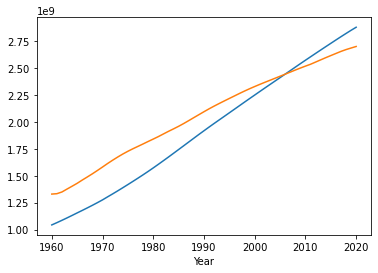

In [172]:
#Population evolution comparison


ax = non_part_pop["Total_Population"].plot()
part_pop["Total_Population"].plot(ax=ax)

In [173]:
#CO2 per person in participant countries

df1 = part_CO2["part_sum"].copy()
df2 = part_pop["Total_Population"].copy()
df3 = pd.concat([df1,df2],axis=1)
df3["CO2 per person"] = df3["part_sum"]/df3["Total_Population"]
df3

,part_sum,Total_Population,CO2 per person
Year,,,
1960,6.245628e+09,1.329477e+09,4.697808
1961,6.084627e+09,1.333043e+09,4.564462
1962,6.209875e+09,1.348952e+09,4.603482
1963,6.488857e+09,1.375962e+09,4.715871
1964,6.746515e+09,1.402374e+09,4.810783
...,...,...,...
2016,2.040074e+10,2.634333e+09,7.744175
2017,2.057127e+10,2.653571e+09,7.752297
2018,2.107452e+10,2.670545e+09,7.891468


In [174]:
#CO2 per person in non-participant countries

df4 = non_part_CO2["non_part_sum"].copy()
df5 = non_part_pop["Total_Population"].copy()
df6 = pd.concat([df4,df5],axis=1)
df6["CO2 per person"] = df6["non_part_sum"]/df6["Total_Population"]
df6

,non_part_sum,Total_Population,CO2 per person
Year,,,
1960,2.115703e+09,1.043234e+09,2.028023
1961,2.234083e+09,1.064181e+09,2.099345
1962,2.359411e+09,1.085903e+09,2.172763
1963,2.519329e+09,1.108268e+09,2.273213
1964,2.703802e+09,1.131217e+09,2.390172
...,...,...,...
2016,1.116527e+10,2.759444e+09,4.046201
2017,1.132669e+10,2.790005e+09,4.059739
2018,1.149109e+10,2.820081e+09,4.074738


<AxesSubplot:xlabel='Year'>

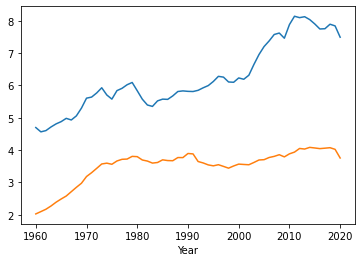

In [175]:
#CO2 emissions per capita comparison

ax = df3["CO2 per person"].plot()
df6["CO2 per person"].plot(ax=ax)

In [176]:
#Average temperature of participant, non-participant and the difference between both

tf1 = part_df["Mean_Temp"].copy()
tf2 = non_part_df["Mean_Temp"].copy()
tf3 = pd.concat([tf1,tf2],axis=1)
tf3.columns = ['Temp P', 'Temp NP']
tf3["diff"] = tf3['Temp NP']-tf3['Temp P']
tf3
                

,Temp P,Temp NP,diff
Year,,,
1960,12.657826,16.766522,4.108696
1961,12.904348,16.750435,3.846087
1962,12.156522,16.631739,4.475217
1963,12.103478,16.576957,4.473478
1964,12.442609,16.399130,3.956522
...,...,...,...
2016,13.739565,17.862174,4.122609
2017,13.679565,17.690000,4.010435
2018,13.853043,17.810870,3.957826


<AxesSubplot:xlabel='Year'>

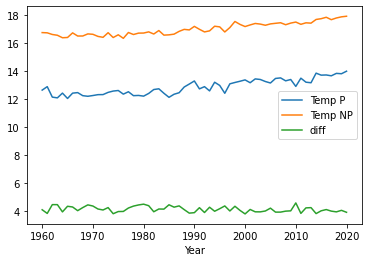

In [177]:
tf3.plot()

In [178]:
#Mixing participants and non-participants to create a new separation depending on the total emissions.

s1 = part_CO2.copy()
s2 = non_part_CO2.copy()
sorting_CO2 = pd.concat([s1,s2], axis=1)
sorting_CO2 = sorting_CO2.drop(["non_part_mean", "part_mean","non_part_sum","part_sum"], axis = 1)
sorting_CO2 = sorting_CO2.sort_values(by ='2019', axis=1)
sorting_CO2

Entity,Rwanda,Iceland,Luxembourg,Ivory Coast,Kenya,Denmark,Switzerland,Ireland,Sweden,Norway,...,Saudi Arabia,South Korea,Indonesia,Germany,Iran,Japan,Russia,India,United States,China
Year,,,,,,,,,,,,,,,,,,,,,
1960,69825,1212488,11507762,461664,2424144,29749520,19498527,11168536,49170521,13086807,...,2674363,12540118,21385193,813950210,37358599,232499641,882927058,111450248,2897138041,798799921
1961,91495,1091575,11580983,553264,2398585,31701867,20360943,12352601,48799507,13335483,...,3568320,14448706,26001595,834839623,36508758,282786898,910542450,120539453,2886696092,570630187
1962,84272,1197742,11540679,586240,2622025,36889884,24123366,13106731,51272587,14060391,...,6250041,17261588,22974894,883168603,37428423,292864430,955666762,132728645,2993718164,459618074
1963,84272,1303997,11438176,622880,2852859,40667913,29070360,13447305,55313057,14965280,...,6938814,21083171,22763095,945497986,41304935,324835463,1024911159,142601450,3126294023,456779449
1964,36640,1307601,12295552,762112,2823250,43146926,28129375,14216062,60368070,16170320,...,7041168,22195155,22374265,968917486,47519079,358891094,1090019669,139639166,3264110570,460637094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,1036390,3487423,9092741,11798080,17155983,37011386,39192544,40155799,43262009,44800000,...,639056486,639258641,560845982,800686632,637361528,1203717880,1618598940,2382223220,5248023931,9720444086
2017,1050459,3604886,9261344,11860368,16322312,34743087,38182513,39133421,42593728,44372000,...,639377966,655747114,575175792,785882918,712256079,1188122842,1646456968,2433855754,5207751278,9920459189
2018,1142030,3663377,9568440,10251872,18016496,34672351,36867631,39195155,42095408,44469000,...,621952743,671630709,614884277,754111607,707157389,1143457876,1691646718,2599805717,5375490614,10289989525


In [179]:
less_CO2_countries = sorting_CO2.iloc[:,0:23]
less_CO2_countries["Small_sum"] = less_CO2_countries.sum(axis=1)
less_CO2_countries

C:\Users\jadca\AppData\Local\Temp/ipykernel_6584/2408642320.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  less_CO2_countries["Small_sum"] = less_CO2_countries.sum(axis=1)


Entity,Rwanda,Iceland,Luxembourg,Ivory Coast,Kenya,Denmark,Switzerland,Ireland,Sweden,Norway,...,Austria,Colombia,Belgium,Nigeria,Philippines,Netherlands,United Arab Emirates,Argentina,Egypt,Small_sum
Year,,,,,,,,,,,,,,,,,,,,,
1960,69825,1212488,11507762,461664,2424144,29749520,19498527,11168536,49170521,13086807,...,30784479,16390487,90908083,3403173,8325063,73437600,10992,48764500,16032731,451864288
1961,91495,1091575,11580983,553264,2398585,31701867,20360943,12352601,48799507,13335483,...,31824045,18196304,92698294,4109552,8712524,75818784,10992,51126710,17065918,469868806
1962,84272,1197742,11540679,586240,2622025,36889884,24123366,13106731,51272587,14060391,...,33864981,19419485,98018304,4174999,10335915,83281906,18320,53640125,18571110,506693555
1963,84272,1303997,11438176,622880,2852859,40667913,29070360,13447305,55313057,14965280,...,36949060,21232780,105676390,5343636,11471815,91144582,21984,50032660,21526859,546917861
1964,36640,1307601,12295552,762112,2823250,43146926,28129375,14216062,60368070,16170320,...,38896434,21682947,103553992,7266700,12822820,96776605,18320,55670041,25491247,578382996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,1036390,3487423,9092741,11798080,17155983,37011386,39192544,40155799,43262009,44800000,...,67215457,93241979,99872138,115821151,122237309,164925247,214666772,190977194,234122634,1773397059
2017,1050459,3604886,9261344,11860368,16322312,34743087,38182513,39133421,42593728,44372000,...,69598854,86295788,99448135,114043392,134901810,162610064,168831314,187804729,250604761,1743287528
2018,1142030,3663377,9568440,10251872,18016496,34672351,36867631,39195155,42095408,44469000,...,66565408,84880525,100227169,127928170,140658221,159020034,154203574,181099627,227721467,1712093487


In [180]:
#Countries that arent bigger emitters of CO2 but are participants in the events.
smaller_emitters = list(less_CO2_countries.columns)
set(smaller_emitters) & set(participants_list)

{'Egypt',
 'Greece',
 'Iceland',
 'Ivory Coast',
 'Kenya',
 'Luxembourg',
 'Netherlands',
 'Norway',
 'Portugal',
 'Rwanda',
 'Sweden',
 'Switzerland',
 'United Arab Emirates'}

In [181]:
most_CO2_countries = sorting_CO2.iloc[:,23:46]
most_CO2_countries["Big_sum"] = most_CO2_countries.sum(axis=1)
most_CO2_countries

C:\Users\jadca\AppData\Local\Temp/ipykernel_6584/2609185401.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  most_CO2_countries["Big_sum"] = most_CO2_countries.sum(axis=1)


Entity,Spain,Thailand,Malaysia,France,Poland,Italy,United Kingdom,Turkey,Australia,Mexico,...,South Korea,Indonesia,Germany,Iran,Japan,Russia,India,United States,China,Big_sum
Year,,,,,,,,,,,,,,,,,,,,,
1960,48865574,3709492,4201450,295396413,199577073,109203087,584020018,16798537,88118900,63052287,...,12540118,21385193,813950210,37358599,232499641,882927058,111450248,2897138041,798799921,7561077732
1961,53606856,4140715,4684919,314658506,207235406,124374897,588614801,17340838,90503896,65239903,...,14448706,26001595,834839623,36508758,282786898,910542450,120539453,2886696092,570630187,7502227862
1962,59975850,5026779,4776549,331822402,216607175,146254985,592931499,21604546,94823455,63743714,...,17261588,22974894,883168603,37428423,292864430,955666762,132728645,2993718164,459618074,7705538792
1963,58742903,5561604,5827968,337791461,230998833,164556239,603385663,22639942,100934264,66292194,...,21083171,22763095,945497986,41304935,324835463,1024911159,142601450,3126294023,456779449,8085927481
1964,64323808,7470283,7399409,367995875,242880480,175721076,607865989,26302962,108875767,74200126,...,22195155,22374265,968917486,47519079,358891094,1090019669,139639166,3264110570,460637094,8478170949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,260757956,283434535,250560642,333578746,324341690,358060743,399337394,401239738,415945172,482798052,...,639258641,560845982,800686632,637361528,1203717880,1618598940,2382223220,5248023931,9720444086,28477356025
2017,274641963,285959563,250561320,336995589,337682844,352849912,387565181,425329230,414751197,459849151,...,655747114,575175792,785882918,712256079,1188122842,1646456968,2433855754,5207751278,9920459189,28825588741
2018,269713437,276176956,272229353,322371888,336992311,349020446,381889659,419436905,416001157,455307901,...,671630709,614884277,754111607,707157389,1143457876,1691646718,2599805717,5375490614,10289989525,29496615470


In [182]:
#Big emitters of CO2 that doesn't participate on the listed events.

bigger_emitters = list(most_CO2_countries.columns)
set(bigger_emitters) & set(non_participants_list)

{'Australia',
 'Brazil',
 'Canada',
 'India',
 'Iran',
 'Japan',
 'Malaysia',
 'Mexico',
 'Russia',
 'Saudi Arabia',
 'South Africa',
 'Thailand',
 'Turkey'}

<AxesSubplot:xlabel='Year'>

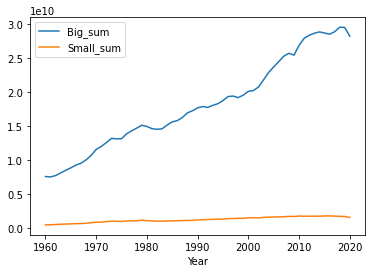

In [183]:
#difference between the biggest emmiters and the rest

em1 = most_CO2_countries["Big_sum"].copy()
em2 = less_CO2_countries["Small_sum"].copy()
em3 = pd.concat([em1,em2],axis=1)
em3.plot()

In [184]:
most_contaminating_people = pop.loc[pop["Country Name"].isin(bigger_emitters)]
most_contaminating_people.drop(columns = "Country Code", inplace = True)
most_contaminating_people.drop(columns = "Indicator Code", inplace = True)
most_contaminating_people.drop(columns = "Indicator Name", inplace = True)
most_contaminating_people.set_index("Country Name", inplace = True)
most_contaminating_people = most_contaminating_people.T
most_contaminating_people = most_contaminating_people.dropna()
most_contaminating_people["Total_Population"] = most_contaminating_people.sum(axis=1)
most_contaminating_people.index.names = ['Year']
most_contaminating_people

C:\Users\jadca\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Country Name,Australia,Brazil,Canada,China,Germany,Spain,France,United Kingdom,Indonesia,India,...,Mexico,Malaysia,Poland,Russia,Saudi Arabia,Thailand,Turkey,United States,South Africa,Total_Population
Year,,,,,,,,,,,,,,,,,,,,,
1960,10276477.0,72179235.0,17909009.0,6.670700e+08,72814900.0,30455000.0,46621688.0,52400000.0,87751066.0,4.505477e+08,...,37771861.0,8156342.0,29637450.0,119897000.0,4086534.0,27397208.0,27472339.0,180671000.0,17099836.0,2.150550e+09
1961,10483000.0,74311338.0,18271000.0,6.603300e+08,73377632.0,30739250.0,47240526.0,52800000.0,90098396.0,4.596422e+08,...,38966049.0,8417821.0,29964000.0,121236000.0,4218852.0,28224186.0,28146909.0,183691000.0,17524533.0,2.170520e+09
1962,10742000.0,76514329.0,18614000.0,6.657700e+08,74025784.0,31023366.0,47904879.0,53250000.0,92518373.0,4.690772e+08,...,40195318.0,8692337.0,30308500.0,122591000.0,4362788.0,29080945.0,28832831.0,186538000.0,17965733.0,2.203404e+09
1963,10950000.0,78772647.0,18964000.0,6.823350e+08,74714353.0,31296651.0,48582624.0,53650000.0,95015295.0,4.788256e+08,...,41462373.0,8973791.0,30712000.0,123960000.0,4516540.0,29966873.0,29531362.0,189242000.0,18423157.0,2.247988e+09
1964,11167000.0,81064572.0,19325000.0,6.983550e+08,75318337.0,31609195.0,49230585.0,54000000.0,97596728.0,4.888481e+08,...,42771077.0,9253827.0,31139450.0,125345000.0,4677304.0,30881136.0,30244258.0,191889000.0,18896303.0,2.292482e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,24190907.0,206163056.0,36109487.0,1.387790e+09,82348669.0,46484062.0,66724104.0,65611593.0,261556386.0,1.324517e+09,...,123333379.0,30684652.0,37970087.0,144342397.0,32443443.0,68971313.0,79827868.0,323071755.0,56207649.0,4.716752e+09
2017,24601860.0,207833825.0,36545236.0,1.396215e+09,82657002.0,46593236.0,66918020.0,66058859.0,264650969.0,1.338677e+09,...,124777326.0,31104655.0,37974826.0,144496739.0,33101183.0,69209817.0,81116451.0,325122128.0,57009751.0,4.754022e+09
2018,24982688.0,209469320.0,37065084.0,1.402760e+09,82905782.0,46797754.0,67101930.0,66460344.0,267670549.0,1.352642e+09,...,126190782.0,31528033.0,37974750.0,144477859.0,33702757.0,69428454.0,82340090.0,326838199.0,57792520.0,4.788465e+09


In [185]:
less_contaminating_people = pop.loc[pop["Country Name"].isin(smaller_emitters)]
less_contaminating_people.drop(columns = "Country Code", inplace = True)
less_contaminating_people.drop(columns = "Indicator Code", inplace = True)
less_contaminating_people.drop(columns = "Indicator Name", inplace = True)
less_contaminating_people.set_index("Country Name", inplace = True)
less_contaminating_people = less_contaminating_people.T
less_contaminating_people = less_contaminating_people.dropna()
less_contaminating_people["Total_Population"] = less_contaminating_people.sum(axis=1)
less_contaminating_people.index.names = ['Year']
less_contaminating_people

C:\Users\jadca\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Country Name,United Arab Emirates,Argentina,Austria,Belgium,Switzerland,Ivory Coast,Colombia,Denmark,Egypt,Greece,...,Luxembourg,Nigeria,Netherlands,Norway,Philippines,Portugal,Rwanda,Singapore,Sweden,Total_Population
Year,,,,,,,,,,,,,,,,,,,,,
1960,92417.0,20481781.0,7047539.0,9153489.0,5327827.0,3503559.0,16057714.0,4579603.0,26632891.0,8331725.0,...,313970.0,45138460.0,11486631.0,3581239.0,26269741.0,8857716.0,2935575.0,1646400.0,7484656.0,222161209.0
1961,100801.0,20817270.0,7086299.0,9183948.0,5434294.0,3631547.0,16567817.0,4611687.0,27366239.0,8398050.0,...,316845.0,46063570.0,11638712.0,3609800.0,27161052.0,8929316.0,2998334.0,1702400.0,7519998.0,226704101.0
1962,112112.0,21153042.0,7129864.0,9220578.0,5573815.0,3770756.0,17092919.0,4647727.0,28112258.0,8448233.0,...,320750.0,47029818.0,11805689.0,3638918.0,28077345.0,8993985.0,3052937.0,1750200.0,7561588.0,231450964.0
1963,125130.0,21488916.0,7175811.0,9289770.0,5694247.0,3918630.0,17629978.0,4684483.0,28871383.0,8479625.0,...,324100.0,48032932.0,11965966.0,3666537.0,29012630.0,9030355.0,3105417.0,1795000.0,7604328.0,236241051.0
1964,138049.0,21824427.0,7223801.0,9378113.0,5789228.0,4071411.0,18175187.0,4722072.0,29644875.0,8510429.0,...,327750.0,49066762.0,12127120.0,3694339.0,29958687.0,9035365.0,3164258.0,1841600.0,7661354.0,241108052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,9360975.0,43590368.0,8736668.0,11331422.0,8373338.0,23822726.0,48175048.0,5728010.0,94447071.0,10775971.0,...,582014.0,185960244.0,17030314.0,5234519.0,103663812.0,10325452.0,11668829.0,5607283.0,9923085.0,677025454.0
2017,9487206.0,44044811.0,8797566.0,11375158.0,8451840.0,24437475.0,48909844.0,5764980.0,96442590.0,10754679.0,...,596336.0,190873247.0,17131296.0,5276968.0,105172921.0,10300300.0,11980960.0,5612253.0,10057698.0,689553362.0
2018,9630966.0,44494502.0,8840521.0,11427054.0,8514329.0,25069226.0,49661056.0,5793636.0,98423602.0,10732882.0,...,607950.0,195874685.0,17231624.0,5311916.0,106651394.0,10283822.0,12301969.0,5638676.0,10175214.0,702160431.0


<AxesSubplot:xlabel='Year'>

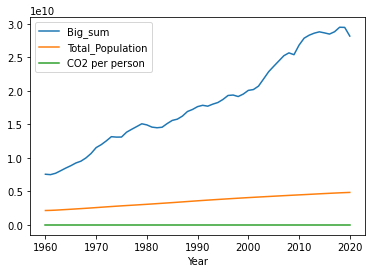

In [186]:
#Evolution of population, emissions per capita and total emissions in the 'Big emissions' group

mc1 = most_CO2_countries["Big_sum"].copy()
mc2 = most_contaminating_people["Total_Population"].copy()
mc3 = pd.concat([mc1,mc2],axis=1)
mc3["CO2 per person"] = mc3["Big_sum"]/mc3["Total_Population"]
mc3.plot()

<AxesSubplot:xlabel='Year'>

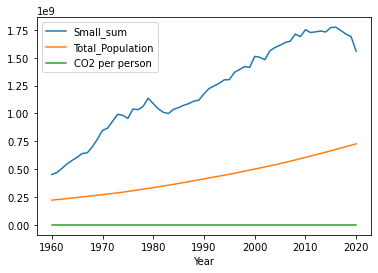

In [187]:
#Evolution of population, emissions per capita and total emissions in the 'Low emissions' group


mc4 = less_CO2_countries["Small_sum"].copy()
mc5 = less_contaminating_people["Total_Population"].copy()
mc6 = pd.concat([mc4,mc5],axis=1)
mc6["CO2 per person"] = mc6["Small_sum"]/mc6["Total_Population"]
mc6.plot()

<AxesSubplot:xlabel='Year'>

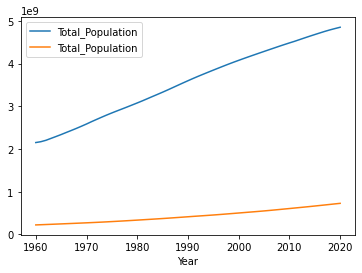

In [188]:
#Population difference between the Big and Low emitters groups
newPop1 = most_contaminating_people["Total_Population"].copy()
newPop2 = less_contaminating_people["Total_Population"].copy()
newPop3 = pd.concat([newPop1,newPop2],axis=1)
newPop3.plot()

<AxesSubplot:xlabel='Year'>

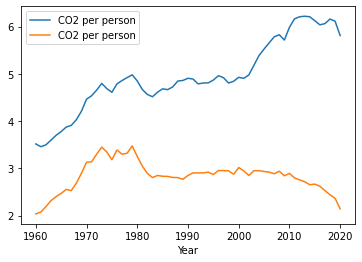

In [189]:
#CO2 per capita difference between the Big and Low emitters groups

newPop7 = mc3["CO2 per person"].copy()
newPop8 = mc6["CO2 per person"].copy()
newPop9 = pd.concat([newPop7,newPop8],axis=1)
newPop9.plot()

In [190]:
#Cleaning and separating again, this time by GDP per Capita.

gdp_per_capita = pd.read_csv("API_NY.GDP.PCAP.CD_DS2_en_csv_v2_4150786.csv")
gdp_per_capita = gdp_per_capita.drop(["Country Code", "Indicator Name","Indicator Code","Unnamed: 66"], axis = 1)
gdp_per_capita = gdp_per_capita[['Country Name', '2019']].copy()
gdp_per_capita["Country Name"].replace({"Cote d'Ivoire" : "Ivory Coast"}, inplace=True)
gdp_per_capita["Country Name"].replace({'Egypt, Arab Rep.' : "Egypt"}, inplace=True)
gdp_per_capita["Country Name"].replace({'Korea, Rep.' : "South Korea"}, inplace=True)
gdp_per_capita["Country Name"].replace({'Iran, Islamic Rep.' : "Iran"}, inplace=True)
gdp_per_capita["Country Name"].replace({'Russian Federation' : "Russia"}, inplace=True)
gdp_per_capita["Country Name"].replace({"Cote d'Ivoire" : "Ivory Coast"}, inplace=True)
full_gdp = gdp_per_capita
gdp_per_capita = gdp_per_capita.loc[gdp_per_capita["Country Name"].isin(sorting_CO2.columns)]
gdp_per_capita.set_index("Country Name", inplace = True)
gdp_per_capita["emissions"] = sorting_CO2.iloc[59]

pop_total = pd.concat([part_pop, non_part_pop], axis=1)
pop_total = pop_total.drop(["Total_Population", "Total_Population"], axis = 1)
gdp_per_capita["population"] = pop_total.iloc[59]
gdp_per_capita["emissions per capita"] = gdp_per_capita["emissions"]/gdp_per_capita["population"]
gdp_per_capita.rename(columns = {'2019':'GDP per Capita'}, inplace = True)
gdp_per_capita = gdp_per_capita.sort_values("GDP per Capita")


gdp_per_capita_low = gdp_per_capita.iloc[0:12]
gdp_per_capita_med_low = gdp_per_capita.iloc[12:23]
gdp_per_capita_med_high = gdp_per_capita.iloc[23:34]
gdp_per_capita_high = gdp_per_capita.iloc[34:46]

#The hypothesis is that richer people will emit more CO2 than poorer ones
#gdp_per_capita_low < gdp_per_capita_med_low < gdp_per_capita_med_high < gdp_per_capita_high

alpha = 0.01

sample_h = gdp_per_capita_high["emissions per capita"]
sample_mh = gdp_per_capita_med_high["emissions per capita"]
sample_ml = gdp_per_capita_med_low["emissions per capita"]
sample_l = gdp_per_capita_low["emissions per capita"]

mean_h = sample_h.mean()
mean_mh = sample_mh.mean()
mean_ml = sample_ml.mean()
mean_l = sample_l.mean()

std_h = sample_h.std(ddof = 1)
std_mh = sample_mh.std(ddof = 1)
std_ml = sample_ml.std(ddof = 1)
std_l = sample_l.std(ddof = 1)

size = 10

#low vs med_low

stat = (mean_l - mean_ml)/(std_l/ np.sqrt(size))
stat

p_value = st.t.sf(abs(stat),size-1)*2

print(p_value)
print("low<med_low: ", p_value < alpha)


#med_low vs med_high
stat = (mean_ml - mean_mh)/(std_ml/ np.sqrt(size))
stat

p_value = st.t.sf(abs(stat),size-1)*2

print(p_value)
print("med_low<med_high: ", p_value < alpha)

#med_high vs high

stat = (mean_mh - mean_h)/(std_mh/ np.sqrt(size))
stat

p_value = st.t.sf(abs(stat),size-1)*2

print(p_value)
print("med_high<high: ", p_value < alpha)
print("\n Means:")
print(gdp_per_capita_low["emissions per capita"].mean())
print(gdp_per_capita_med_low["emissions per capita"].mean())
print(gdp_per_capita_med_high["emissions per capita"].mean())
print(gdp_per_capita_high["emissions per capita"].mean())

0.0008354712315103415
low<med_low:  True
0.27190167959843
med_low<med_high:  False
0.7604880996786654
med_high<high:  False

 Means:
2.678043244263364
7.215891571943933
8.90227108382723
9.299973151254255


C:\Users\jadca\AppData\Local\Temp/ipykernel_6584/1347780818.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_per_capita["emissions"] = sorting_CO2.iloc[59]
C:\Users\jadca\AppData\Local\Temp/ipykernel_6584/1347780818.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_per_capita["population"] = pop_total.iloc[59]
C:\Users\jadca\AppData\Local\Temp/ipykernel_6584/1347780818.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [ ]:
# The hypothesis is partially true, but only in the lowest step, between low income and medium-low income. In the rest of steps is not that noticeable.

# The next steps are used to save the treated dataframes into CSV I can later use in Tableau.

In [193]:
part_CO2 = part_CO2.T
part_CO2 = part_CO2.stack()
part_CO2 = part_CO2.to_csv('part_CO2.csv', index=True)


In [194]:
non_part_CO2 = non_part_CO2.T
non_part_CO2 = non_part_CO2.stack()
non_part_CO2 = non_part_CO2.to_csv('non_part_CO2.csv', index=True)

In [195]:
part_df = part_df.T
part_df = part_df.stack()
part_df = part_df.to_csv('part_df.csv', index=True)

In [196]:
non_part_df = non_part_df.T
non_part_df = non_part_df.stack()
non_part_df = non_part_df.to_csv('non_part_df.csv', index=True)

In [197]:
part_pop = part_pop.T
part_pop = part_pop.stack()
part_pop = part_pop.to_csv('part_pop.csv', index=True)

In [198]:
non_part_pop = non_part_pop.T
non_part_pop = non_part_pop.stack()
non_part_pop = non_part_pop.to_csv('non_part_pop.csv', index=True)

In [199]:
df3 = df3.to_csv('df3.csv', index=True)

In [200]:
df6 = df6.to_csv('df6.csv', index=True)

In [201]:
tf3 = tf3.to_csv('tf3.csv', index=True)

In [202]:
most_CO2_countries = most_CO2_countries.T
most_CO2_countries = most_CO2_countries.stack()
most_CO2_countries = most_CO2_countries.to_csv("most_CO2_countries.csv", index = True)

In [204]:
less_CO2_countries = less_CO2_countries.T
less_CO2_countries = less_CO2_countries.stack()
less_CO2_countries = less_CO2_countries.to_csv("less_CO2_countries.csv", index = True)

In [206]:
gdp_per_capita_low = gdp_per_capita_low.to_csv('gdp_per_capita_low.csv', index=True)

In [207]:
gdp_per_capita_med_low = gdp_per_capita_med_low.to_csv('gdp_per_capita_med_low.csv', index=True)

In [208]:
gdp_per_capita_med_high = gdp_per_capita_med_high.to_csv('gdp_per_capita_med_high.csv', index=True)

In [209]:
gdp_per_capita_high = gdp_per_capita_high.to_csv('gdp_per_capita_high.csv', index=True)